# Relevance Vector Machine - Regression

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

from RVC import RVC

#from skrvm import RVC

## 1) Ripley's synthetic data

In [21]:
'''# Number of samples.
N = 50

mA = [ -0.5, 0.5]
sigmaA = 0.05
mB = [0.5, -0.5]
sigmaB = 0.05

classA = np.matrix([np.random.normal(mA[0], sigmaA, N), np.random.normal(mA[1], sigmaA, N)])
classB = np.matrix([np.random.normal(mB[0], sigmaB, N), np.random.normal(mB[1], sigmaB, N)])

# Generating matrixes
X = np.concatenate((classA, classB), axis=1).T

T = np.concatenate((np.ones(N), np.zeros(N)), axis=0)'''

data = np.loadtxt(open("dataset.csv", "rb"))
X = data[:, :2]
T = data[:, 2]

classA_indexes = np.argwhere(T == 0)
classB_indexes = np.argwhere(T == 1)

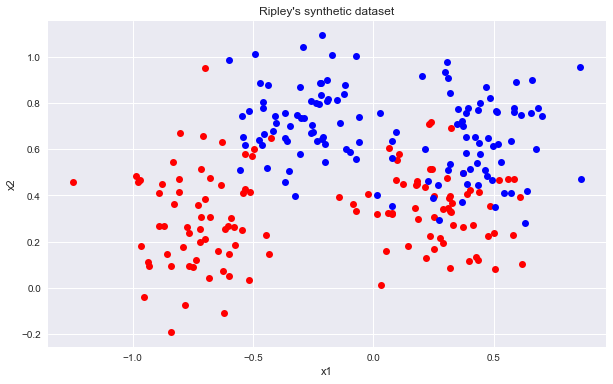

In [22]:
fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X[classA_indexes, 0], X[classA_indexes, 1], 'ro')
plt.plot(X[classB_indexes, 0], X[classB_indexes, 1], 'bo')
plt.title('Ripley\'s synthetic dataset')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [23]:
rvc = RVC(coef0=0.5)

rvc.fit(X,T)

relevance_vect = rvc.get_relevance_vectors()
print(" nb rel : ", relevance_vect.shape)
indexes_relev_vect = [i for i,x in enumerate(X) if x in relevance_vect]
pred = rvc.predict_proba(X)
#print(pred)

'''rvc = RVC(verbose=True)
rvc.fit(X,T)
'''

A Jupyter Widget

 nb rel :  (5, 2)


'rvc = RVC(verbose=True)\nrvc.fit(X,T)\n'

In [24]:
print(pred)

[2.31690205e-02 1.75324738e-04 2.52713460e-04 1.08710405e-02
 4.90240959e-01 2.10311349e-01 3.86003966e-02 8.52497098e-06
 8.36473355e-02 9.83970172e-02 1.05557389e-01 1.35856623e-05
 2.94644229e-01 1.79668222e-01 7.79744688e-01 6.12100864e-03
 7.13742826e-02 2.95819777e-02 2.19336502e-01 2.78837092e-02
 4.05374347e-02 2.43965566e-04 1.21499428e-03 2.69074541e-03
 1.07904686e-04 7.58627715e-03 1.11970669e-01 1.80369873e-02
 1.40955953e-01 1.04288968e-02 1.13689622e-01 4.05969729e-04
 1.25154842e-05 4.90990918e-07 1.08290622e-01 4.70093279e-01
 2.88212031e-03 2.35069877e-12 9.04519027e-05 8.85522274e-04
 4.94984143e-02 7.90961425e-01 3.69417374e-01 7.43300910e-01
 9.03048267e-05 1.78218276e-01 1.68503654e-02 2.18621681e-02
 3.50198425e-04 5.10668290e-03 2.75831744e-04 5.87790932e-07
 3.58605633e-01 3.07252398e-02 2.98429245e-01 8.80390861e-01
 7.07567391e-01 1.07471397e-03 2.87339403e-05 4.55189204e-01
 1.63083715e-02 5.76057127e-01 1.81094900e-01 1.32100759e-01
 8.49413534e-03 1.195155

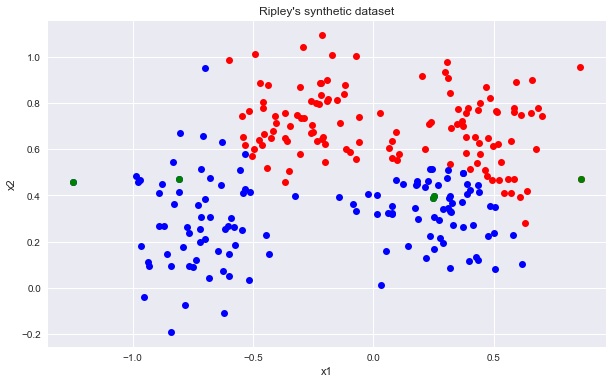

In [25]:
classA_pred = np.argwhere(pred > 0.5)
classB_pred = np.argwhere(pred <= 0.5)

fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X[classA_pred, 0], X[classA_pred, 1], 'ro')
plt.plot(X[classB_pred, 0], X[classB_pred, 1], 'bo')
plt.plot(relevance_vect[:,0], relevance_vect[:,1], 'go')
plt.title('Ripley\'s synthetic dataset')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()